# Intensity Interferometry

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import importlib
import II
from II import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm

In [ ]:
ls = II.LightSource(shape='ellipse')
uv = II.UVplane(ls)

For reference, remember that all layouts are: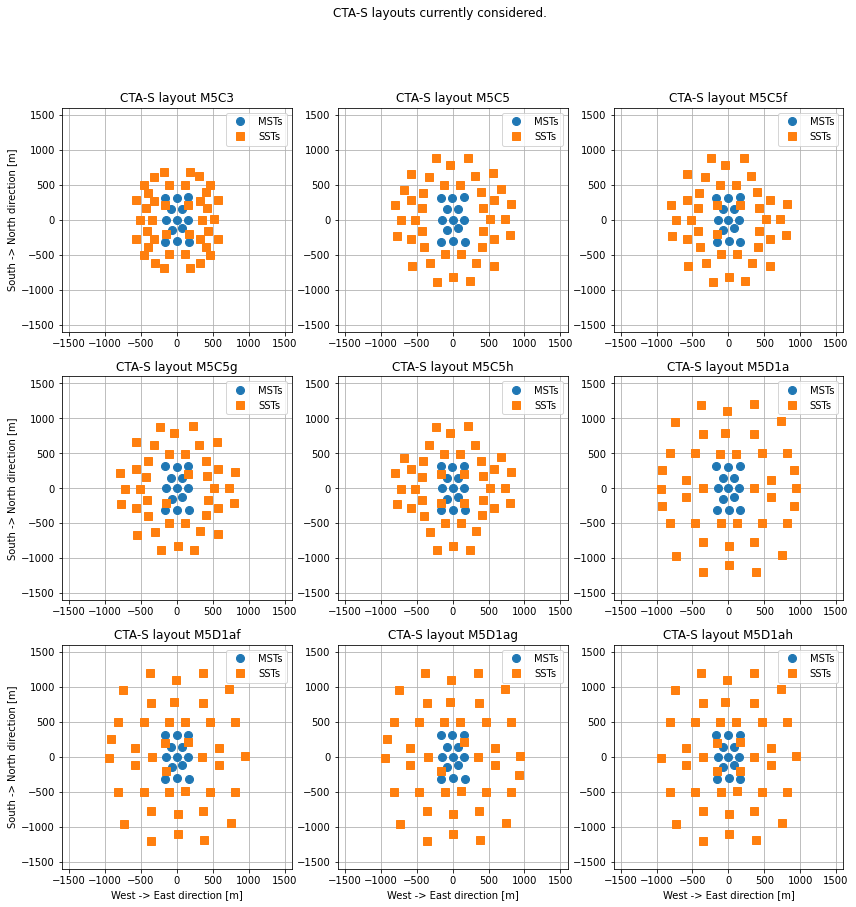

We calculate the signal to noise grid for all the different layouts:

In [ ]:
layouts = ['M5C3', 'M5C5', 'M5C5f', 'M5C5g', 'M5C5h', 'M5D1a', 'M5D1af', 'M5D1ag', 'M5D1ah']
s_n_grid = []
for layout in layouts:
    detector = II.TelescopeArray(uv,layout='layouts/{}/'.format(layout), nGrid=64, nPerTraj=128)
    detector.setGrids()
    s_n_grid.append(detector.getSNRGrid())

Quickly check everything looks reasonable:

In [ ]:
def plot_snr_axis(snr, layout_name, axs, x_label=False, y_label=False):
    x = np.linspace(-detector.bline_max, detector.bline_max, detector.N_snr_grid)
    y = np.linspace(-detector.bline_max, detector.bline_max, detector.N_snr_grid)
    xx, yy = np.meshgrid(x, y)
    im = axs.pcolormesh(xx ,yy , snr.T, norm=LogNorm(), label='SNR')
    if x_label:
        axs.set_xlabel(r'$\lambda \cdot u$ [m]', fontsize = 14)
    if y_label:
        axs.set_ylabel(r'$\lambda \cdot v$ [m]', fontsize = 14)
    cb = plt.colorbar(im, ax=axs)
    cb.ax.tick_params(labelsize=14)
    cb.set_label('SNR', fontsize=16)
#     axs.tick_params(labelsize=14)
    axs.set_title('SNR[{}]'.format(layout_name), fontsize=15)

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=[17,14])
layouts = ['M5C3', 'M5C5', 'M5C5f', 'M5C5g', 'M5C5h', 'M5D1a', 'M5D1af', 'M5D1ag', 'M5D1ah']
plot_snr_axis(s_n_grid[0], layouts[0], ax1, y_label=True)
plot_snr_axis(s_n_grid[1], layouts[1], ax2)
plot_snr_axis(s_n_grid[2], layouts[2], ax3)
plot_snr_axis(s_n_grid[3], layouts[3], ax4, y_label=True)
plot_snr_axis(s_n_grid[4], layouts[4], ax5)
plot_snr_axis(s_n_grid[5], layouts[5], ax6)
plot_snr_axis(s_n_grid[6], layouts[6], ax7, x_label=True, y_label=True)
plot_snr_axis(s_n_grid[7], layouts[7], ax8, x_label=True)
plot_snr_axis(s_n_grid[8], layouts[8], ax9, x_label=True)

plt.show()

Start doing more direct comparison between arrays, by comparing the relative difference of S/N over the U/V plane.

In [ ]:
def plot_snr_comparison_axis(sn1, sn2, layout1, layout2, axs, x_label=False, y_label=False):
    x = np.linspace(-detector.bline_max, detector.bline_max, detector.N_snr_grid)
    y = np.linspace(-detector.bline_max, detector.bline_max, detector.N_snr_grid)
    xx, yy = np.meshgrid(x, y)
    mask = sn1 != 0.
    snr = np.zeros_like(sn1)
    snr[mask] = 1 - sn1[mask]/sn2[mask]
    im = axs.pcolormesh(xx ,yy , snr.T, vmin = -1, vmax = 1, label='SNR')
    if x_label:
        axs.set_xlabel(r'$\lambda \cdot u$ [m]', fontsize = 14)
    if y_label:
        axs.set_ylabel(r'$\lambda \cdot v$ [m]', fontsize = 14)
    cb = plt.colorbar(im, ax=axs)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('relative SNR', fontsize=12)
#     axs.tick_params(labelsize=14)
    axs.set_title('SNR[{}] vs SNR[{}]'.format(layout1, layout2), fontsize=15)

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=[14,14])
layouts = ['M5C3', 'M5C5', 'M5C5f', 'M5C5g', 'M5C5h', 'M5D1a', 'M5D1af', 'M5D1ag', 'M5D1ah']
fig.suptitle('CTA-S layouts currently considered.')
plot_snr_comparison_axis(s_n_grid[0], s_n_grid[8], layouts[0], layouts[8], ax1, y_label=True)
plot_snr_comparison_axis(s_n_grid[1], s_n_grid[8], layouts[1], layouts[8], ax2)
plot_snr_comparison_axis(s_n_grid[2], s_n_grid[8], layouts[2], layouts[8], ax3)
plot_snr_comparison_axis(s_n_grid[3], s_n_grid[8], layouts[3], layouts[8], ax4, y_label=True)
plot_snr_comparison_axis(s_n_grid[4], s_n_grid[8], layouts[4], layouts[8], ax5)
plot_snr_comparison_axis(s_n_grid[5], s_n_grid[8], layouts[5], layouts[8], ax6)
plot_snr_comparison_axis(s_n_grid[6], s_n_grid[8], layouts[6], layouts[8], ax7, x_label=True, y_label=True)
plot_snr_comparison_axis(s_n_grid[7], s_n_grid[8], layouts[7], layouts[8], ax8, x_label=True)
# plot_snr_comparison_axis(s_n_grid[8], s_n_grid[8], layouts[8], layouts[8], ax9, x_label=True)
plt.show()